# Дроздов Дмитрий
## Б01-908
---
### № XI.9.5

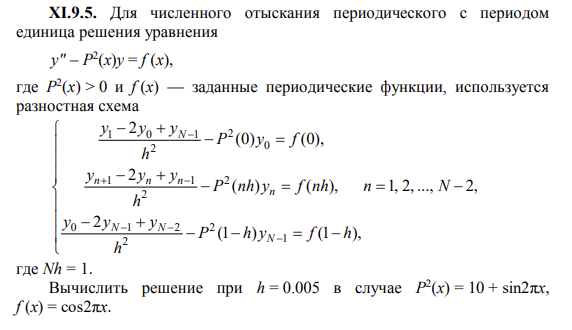

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def P_2(x):
  return 10 + np.sin(2 * np.pi * x)

def F(x):
  return np.cos(2 * np.pi * x)

h = 0.005
T = 1.0
N = int(T / h)

Заполнение матрицы в соответствии с разностной схемой

In [34]:
matrix = np.zeros([N, N])
f = np.zeros([N])

for i in range(0, N):
  id_1 = (i + 1) % N
  id_2 = i
  id_3 = i - 1 #python разрешает отрицательные индексы....
  
  matrix[i][id_1] = matrix[i][id_3] = 1 / (h**2)
  matrix[i][id_2] = 2.0 / (h**2) + P_2(i * h)
  f[i] = F(i * h)


## Tridiagonal matrix algorithm


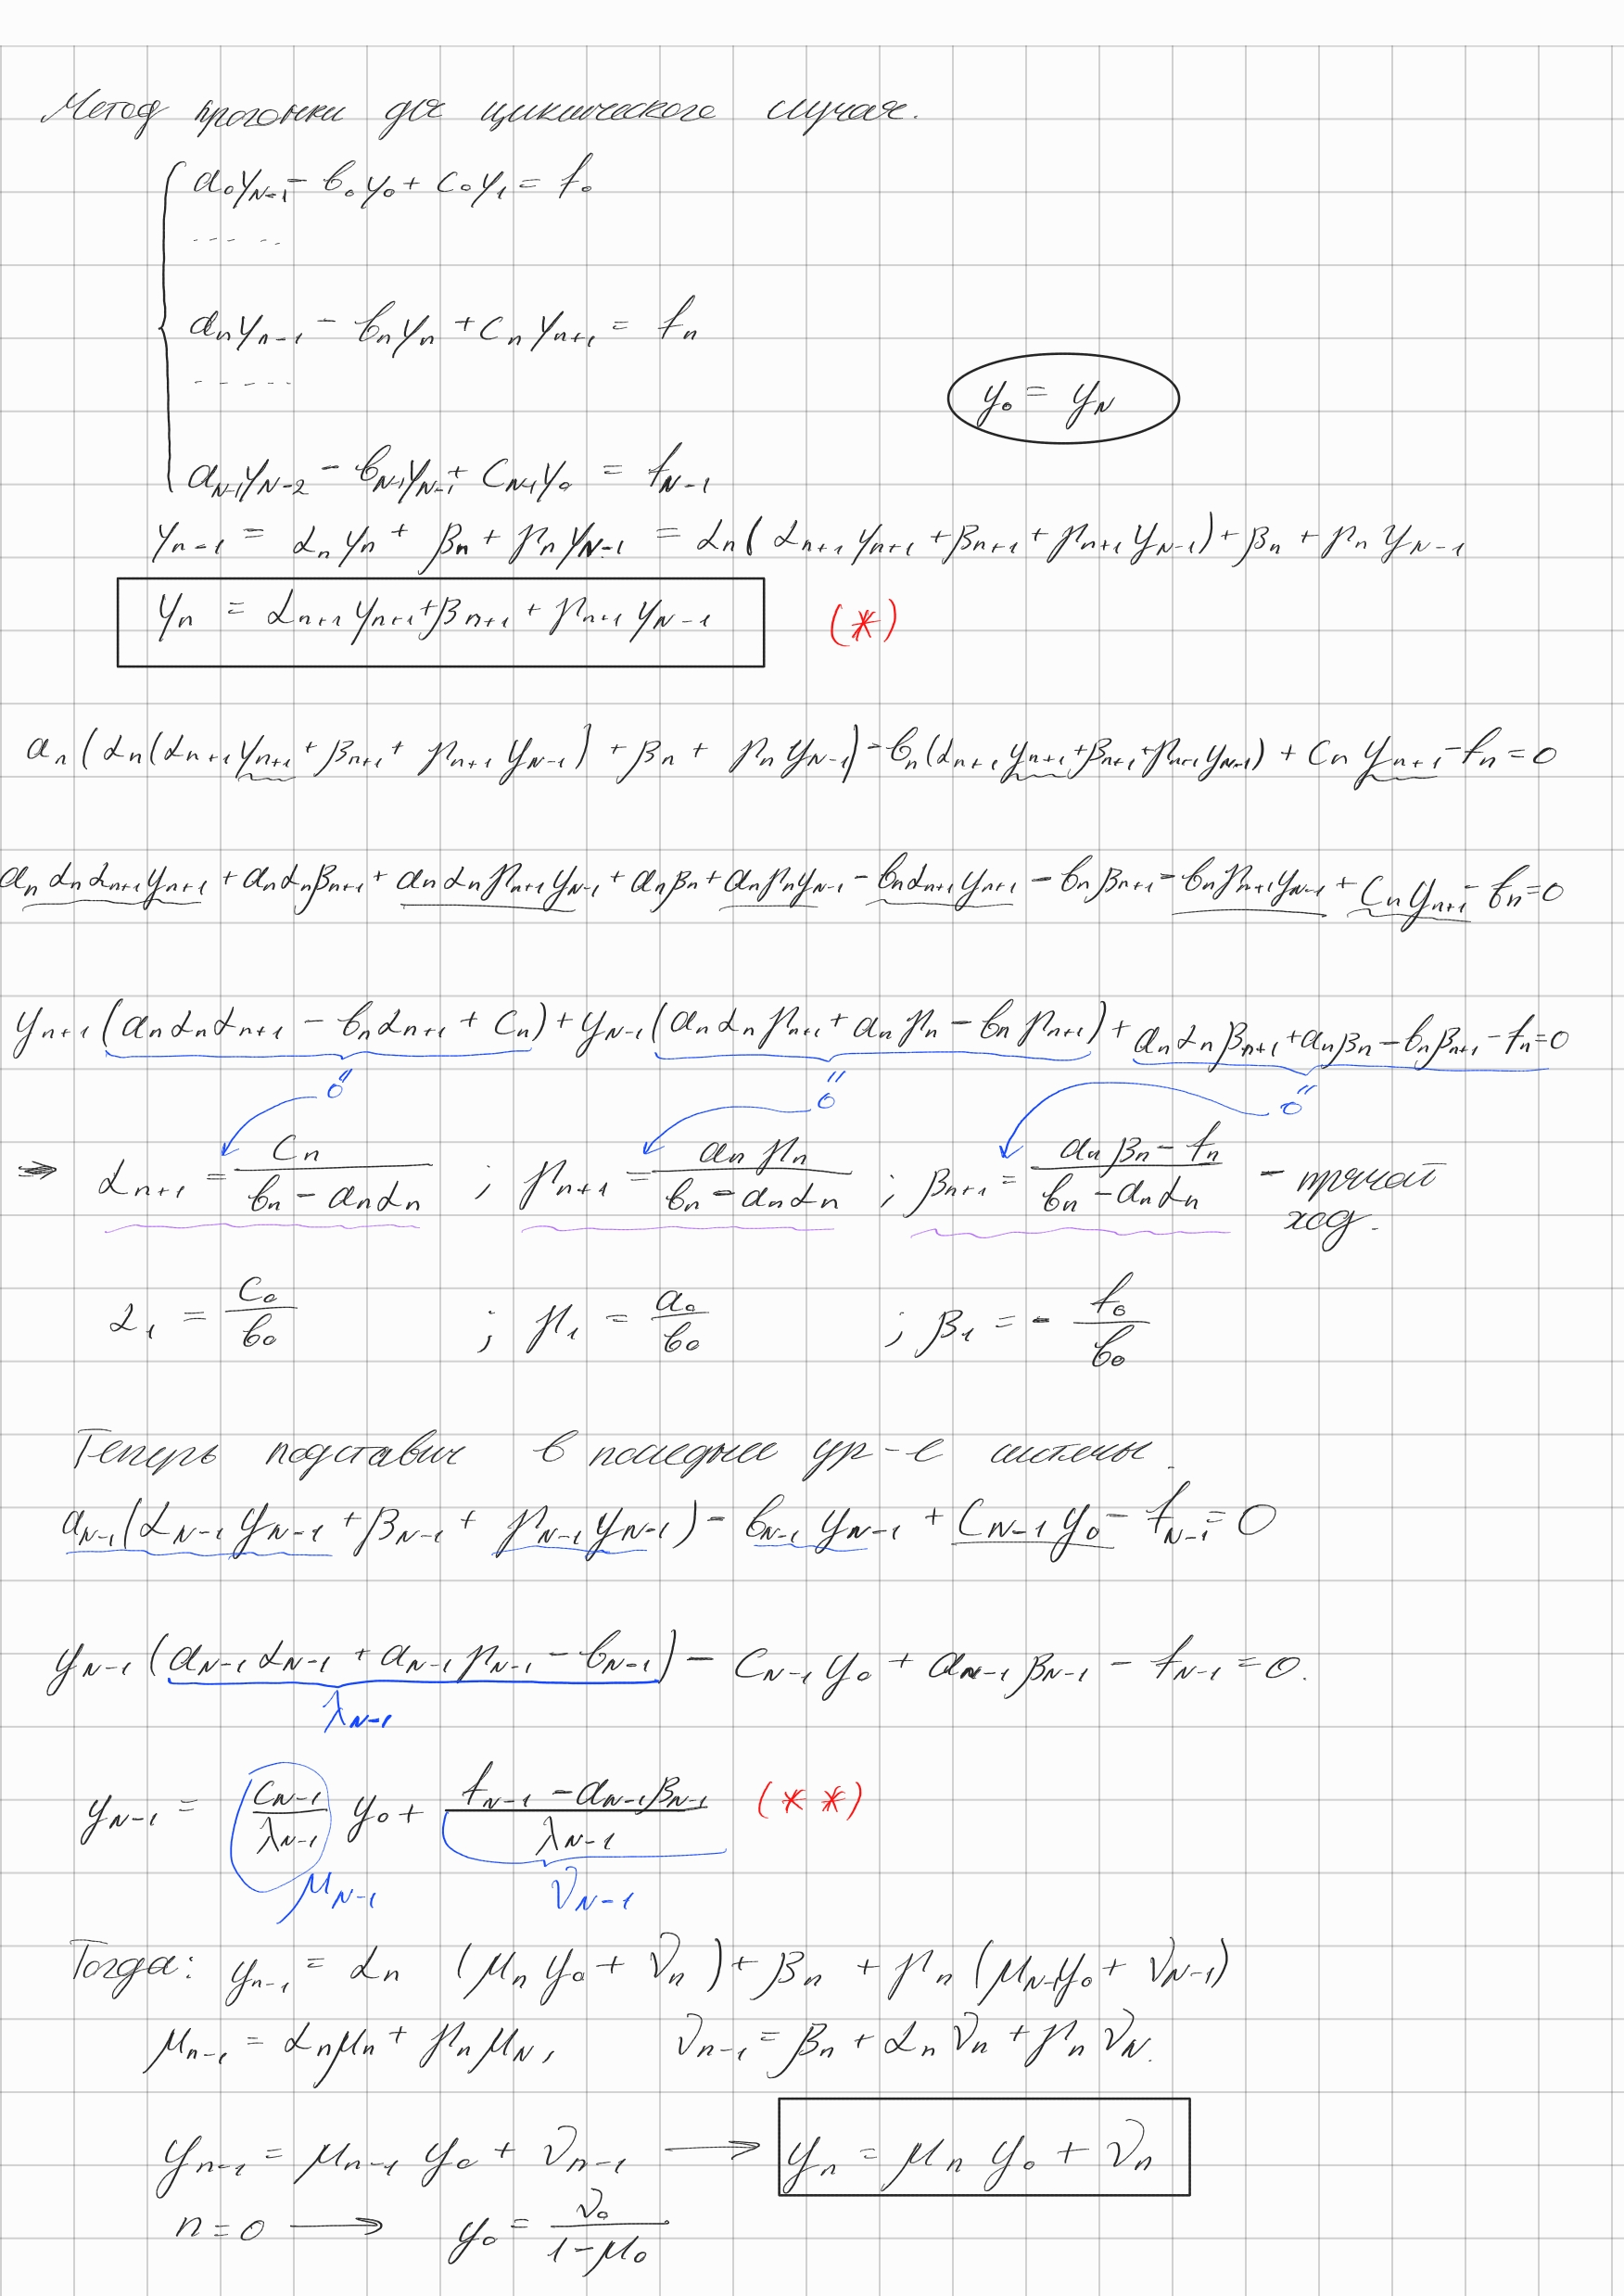

In [35]:
alphas = np.zeros([N])
bettas = np.zeros([N])
gammas = np.zeros([N])
# прямой ход
alphas[0] = matrix[0][1] / matrix[0][0]
gammas[0] = matrix[0][N-1] / matrix[0][0]
bettas[0] = -f[0] / matrix[0][0]

for i in range(1, N):
  a = matrix[i-1][i-2]
  b = matrix[i-1][i-1]
  c = matrix[i-1][i]

  tmp = (b - a * alphas[i-1])
  alphas[i] = c / tmp
  bettas[i] = (a * bettas[i-1] - f[i-1]) / tmp
  gammas[i] = a * gammas[i-1] / tmp

In [36]:
# обратный ход
nu = np.zeros([N])
mu = np.zeros([N])

tmp = (matrix[N-1][N-2] * (alphas[N-1] + gammas[N-1]) - matrix[N-1][N-1])
nu[N-1] = matrix[N-1][0] / tmp
mu[N-1] = (f[N-1] - matrix[N-1][N-2] * bettas[N-1]) / tmp

for i in range(1, N):
  n = N - i
  nu[n-1] = alphas[n] * nu[n] + gammas[n] * nu[N-1]
  mu[n-1] = bettas[n] + alphas[n] * mu[n] + gammas[n] * mu[N-1]

In [37]:
# вычисляем решение
Y = np.zeros([N])
Y[0] = mu[0] / (1 - nu[0])
for n in range(1, N):
  Y[n] = nu[n] * Y[0] + mu[n]

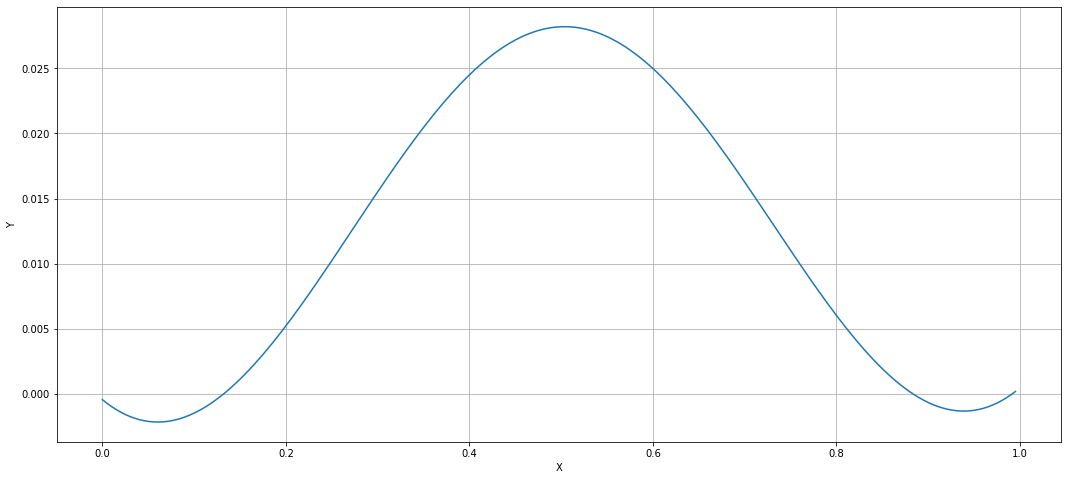

In [38]:
X = np.arange(start=0, stop=1, step=h)

plt.figure(figsize=[18, 8])
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.plot(X, Y)
plt.show()